In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Read the data
df = pd.read_csv('soi.csv')
time_series = df['soi']
df.describe()

,soi
count,1891.000000
mean,-0.043353
std,1.133221
min,-4.340000
25%,-0.780000
50%,-0.020000
75%,0.750000
max,4.070000


# 1. Plot the SOI Time Series
Create a line plot of the El Niño 3.4 sea surface temperature over time. Use appropriate labels and a clear title for the plot.

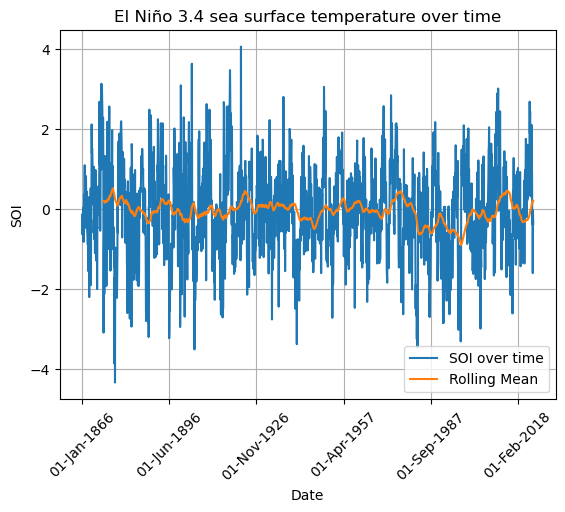

In [26]:
dates = df['DateX']
mm = time_series.rolling(90).mean().dropna()

plt.xlabel('Date')
plt.ylabel('SOI')
plt.plot(dates, time_series, label = 'SOI over time')
plt.plot(mm, label='Rolling Mean')
plt.xticks(df.loc[::365]['DateX'], rotation= 45)
plt.legend(loc='lower right')
plt.title('El Niño 3.4 sea surface temperature over time')
plt.grid()

# 2. Check for Stationarity
Examine the time series graphically to determine if it is stationary. Discuss any observable features of the series.

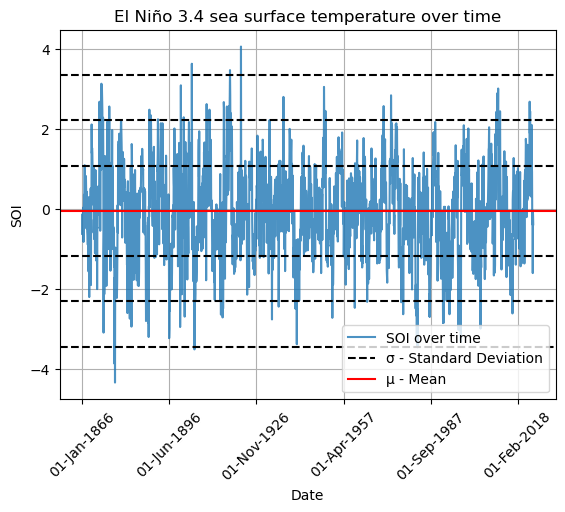

In [27]:
sdev = time_series.std()
mean = time_series.mean()

plt.title('El Niño 3.4 sea surface temperature over time')
plt.plot(dates, time_series, label = 'SOI over time', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('SOI')

plt.axhline(y = mean + sdev, linestyle='--', color='black', label= 'σ - Standard Deviation')
plt.axhline(y = mean + 2*sdev, linestyle='--', color='black')
plt.axhline(y = mean + 3*sdev, linestyle='--', color='black')
plt.axhline(y = mean - sdev, linestyle='--', color='black')
plt.axhline(y = mean - 2*sdev, linestyle='--', color='black')
plt.axhline(y = mean - 3*sdev, linestyle='--', color='black')
plt.xticks(df.loc[::365]['DateX'], rotation= 45)
plt.axhline(y= mean, color='red', label='μ - Mean')
plt.legend(loc='lower right')
plt.grid()

Comparing the plotting of the time series in the first two points of this work, it can be observed an apparently stationary behavior. This fact can be verified by observing that the rolling mean of the data remains relatively constant over time, in a window of 90 days.

# 3. Autocorrelation and Partial Autocorrelation
Compute and plot the autocorrelation and partial autocorrelation functions for the SOI time series. Discuss any significant lags.

In [28]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf

# Read data
df = pd.read_csv('soi.csv')
time_series = df['soi']

# Compute the autocorrelation values using acf
# fft=True uses the FFT method to calculate the ACF, which is faster for large data sets.
autocorrelation_values = acf(time_series, fft=True)

# Compute the partial autocorrelation values using pacf
# The method can be 'ywunbiased' (Yule-Walker), 'ywmle' (Yule-Walker without bias correction),
# 'ols' (Ordinary Least Squares), or 'ld' (Levinson-Durbin).
partial_autocorrelation_values = pacf(time_series, method='ywm')

# Print the results
print("Autocorrelation Values:\n", autocorrelation_values)
print("Partial Autocorrelation Values:\n", partial_autocorrelation_values)


Autocorrelation Values:
 [ 1.          0.59613852  0.49886345  0.43164739  0.38384786  0.33243036
  0.29104274  0.23720813  0.20361633  0.16623001  0.10160019  0.04510102
  0.027809   -0.03164769 -0.08482638 -0.11186089 -0.09145059 -0.08446238
 -0.10908677 -0.12333288 -0.1076037  -0.09463945 -0.08156143 -0.08170341
 -0.10624255 -0.06305629 -0.06334102 -0.03246728 -0.00965525 -0.02095627
 -0.03305569 -0.03087295 -0.03697704]
Partial Autocorrelation Values:
 [ 1.          0.59613852  0.22258474  0.1105944   0.07109839  0.02709865
  0.01653323 -0.02011915 -0.00250634 -0.01409731 -0.06791005 -0.0671351
 -0.00709699 -0.072499   -0.07606728 -0.0362824   0.04549948  0.03240089
 -0.02758957 -0.01881787  0.02375514  0.01806625  0.01867489 -0.00404344
 -0.06209804  0.03840375 -0.01412781  0.03587897  0.02116211 -0.04288385
 -0.03704962 -0.01020209 -0.0221508 ]


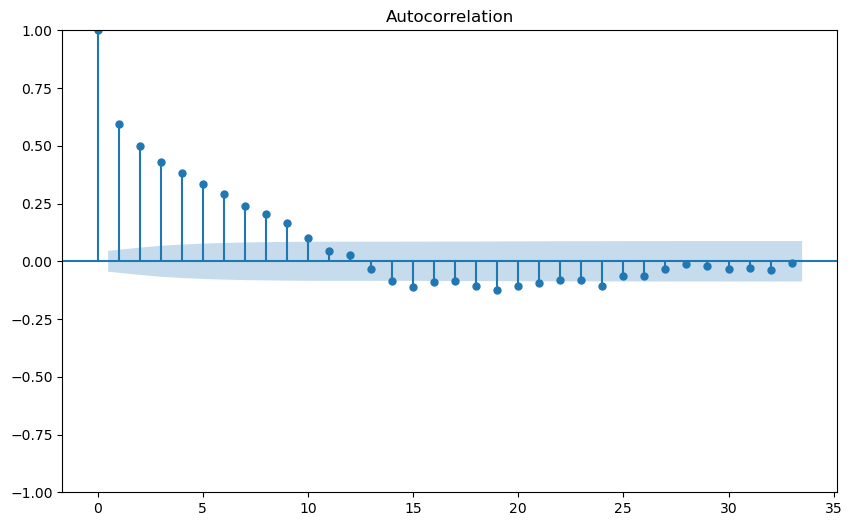

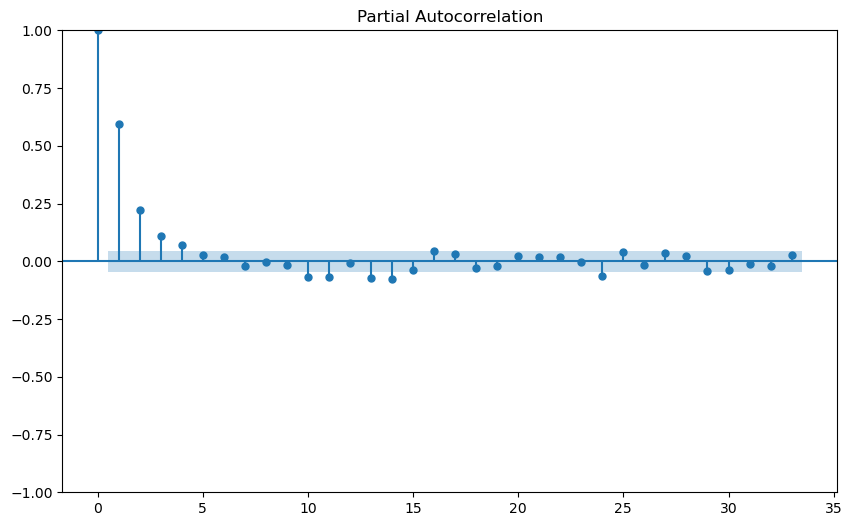

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the correlogram / Autocorrelation plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(time_series, ax=ax)
plt.show()

# Plotting the Partial Autocorrelation plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(time_series, ax=ax, method='ywm')
plt.show()


### Analysis of the Results

- **Autocorrelation Values:**  
  The autocorrelation values decrease gradually, which suggests an AutoRegressive (AR) process.

- **Partial Autocorrelation Values:**  
  The Partial Autocorrelation Values shows a significant initial lag, then drops to lower values that oscillate around zero. The significant initial value followed by a decrease also suggests an AR component.

#### Interpretation and Model Suggestion

> The significant value at the first lag in Partial Autocorrelation Values and the gradual decay in Autocorrelation Values suggest an AR process.

**AR (AutoRegressive) Process:**  
The correlogram analysis points toward an AR process. The gradual decay in Autocorrelation Values and the initial significant value in Partial Autocorrelation Values support the presence of an AR component. However, the exact order of the AR process is not clearly indicated by a sharp cutoff in the Partial Autocorrelation Values; four lags seem to be significant, but the third and fourth ones are pretty close to the uncorrelated zone. Because of this, an AR(2) or AR(1) appears to be a better first approach.

**MA (Moving Average) Component:**  
The absence of a sharp cutoff in the Autocorrelation Values and the fluctuating but generally insignificant values in the Partial Autocorrelation Values after the first few lags suggest that a pure Moving Average (MA) process is less likely to be the sole component.

**ARIMA:**  
Given the gradual decay in Autocorrelation Values and the significant initial lag in PACF, an ARIMA model might be appropriate too.



# 4. Prediction
Divide the dataset into training and testing sets, reserving 30% of the total data for testing. Use the training set to build a time series prediction model. You are free to choose an appropriate model (e.g., ARIMA, SARIMA). Provide a plot comparing the actual values with the predicted values on the testing set.

In [30]:
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('soi.csv')
time_series = df['soi']
Ytrain = time_series[:1323]
Ytest = time_series[1323:]

# Adjusted function to estimate and forecast using ARIMA model
def estimate_and_forecast(order, Ytrain, Ytest):
    model = ARIMA(Ytrain, order=order)
    model_fit = model.fit()
    print(model_fit.summary())
    forecast = model_fit.forecast(steps=len(Ytest))
    mse = np.mean((Ytest - forecast) ** 2)
    print(f'ARIMA{order}, MSE: {mse}')
    return mse


In [31]:
# Descomentar, para ver cada Summary y MSE
#-----------------------------------------------#
#for i in range(1,6):
#    estimate_and_forecast((i,0,0), Ytrain, Ytest)

According to the suggestion in the previous analysis, we test how well the SOI can be represented by an $AR(i)$ model with $i = 1,...,5$. The results indicate that each component of the fit for the $AR(i=1,2,3,4)$ models is statistically significant. However, for the $AR(5)$ model, there is one component that is not. A significance level of $5\%$ is being used. 
Apparently, the 4 models fit the data quite well. The mean squared error (MSE) is very close to approximately $1.33$. However, when comparing based on the AIC criterion, the $AR(4)$ model has the lowest value. For this reason, we can opt for this model.

In [32]:
# Descomentar, para ver cada Summary y MSE
#-----------------------------------------------#
#for i in range(1, 12):
#    estimate_and_forecast((0,0,i), Ytrain, Ytest)

When performing a process similar to the previous one with the $MA(i)$ model with $i=1,...,11$, it is found that the best AIC indicator is for the $MA(11)$ model, and all its components are statistically significant. Additionally, the mean squared error (MSE) of the prediction is close to $1.32$.

In [33]:
# Descomentar, para ver cada Summary y MSE
#-----------------------------------------------#
estimate_and_forecast((4,0,11), Ytrain, Ytest)
estimate_and_forecast((4,0,4), Ytrain, Ytest)
estimate_and_forecast((4,0,5), Ytrain, Ytest)

/home/lachi/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    soi   No. Observations:                 1323
Model:                ARIMA(4, 0, 11)   Log Likelihood               -1706.255
Date:                Thu, 15 Feb 2024   AIC                           3446.510
Time:                        00:46:00   BIC                           3534.700
Sample:                             0   HQIC                          3479.571
                               - 1323                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0272      0.092      0.296      0.767      -0.153       0.207
ar.L1          1.9173      0.112     17.150      0.000       1.698       2.136
ar.L2         -2.0807      0.174    -11.935      0.0

/home/lachi/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    soi   No. Observations:                 1323
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1716.055
Date:                Thu, 15 Feb 2024   AIC                           3452.110
Time:                        00:46:03   BIC                           3503.986
Sample:                             0   HQIC                          3471.557
                               - 1323                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0117      0.073     -0.161      0.872      -0.154       0.131
ar.L1          1.3438      0.159      8.443      0.000       1.032       1.656
ar.L2          0.4872      0.152      3.214      0.0

/home/lachi/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1.3209374976158572

Finally joining the $AR(4)$ with the $MA(11)$ models, the result is an $ARMA(4,11)$ model with a good AIC criterion index,  with 7 not significant rolling mean components though. To correct this $ARMA(4, 4)$ and $ARMA(4, 5)$ models are tried, and the last one has an acceptable AIC with all its components statistically significant.

Comparing the best models it is obtained:

| Modelo | AIC | BIC | MSE |  
|----|----|----|----|  
| $AR(4)$ | 3471.394| 3502.520 | 1.3385 |  
| $MA(11)$ | 3473.776| 3541.216 | 1.3295 |  
| $ARMA(4,5)$ | 3454.668 | 3511.732 | 1.3209 |  

Plotting the three models it is obtained:

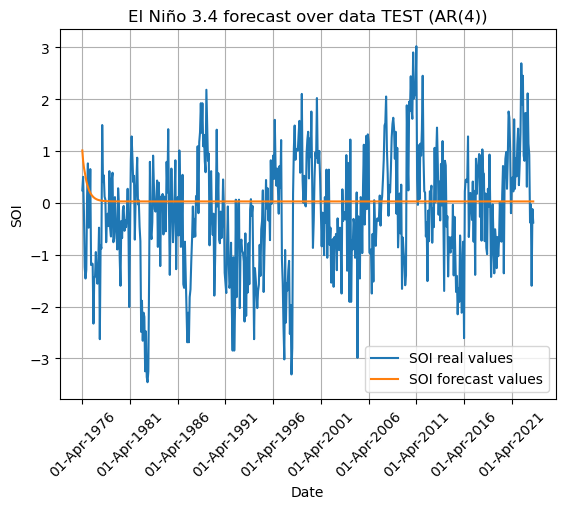

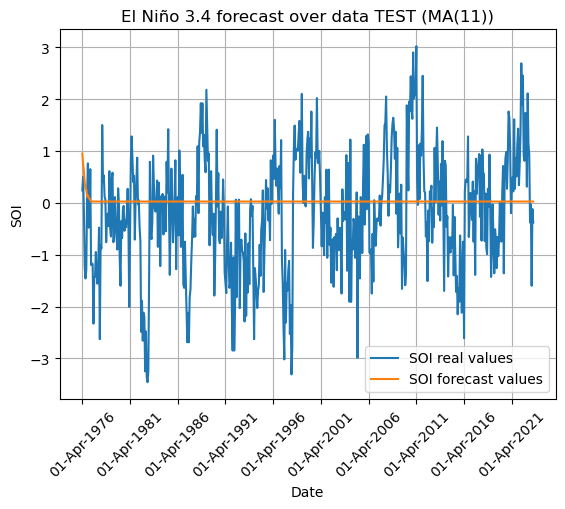

/home/lachi/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


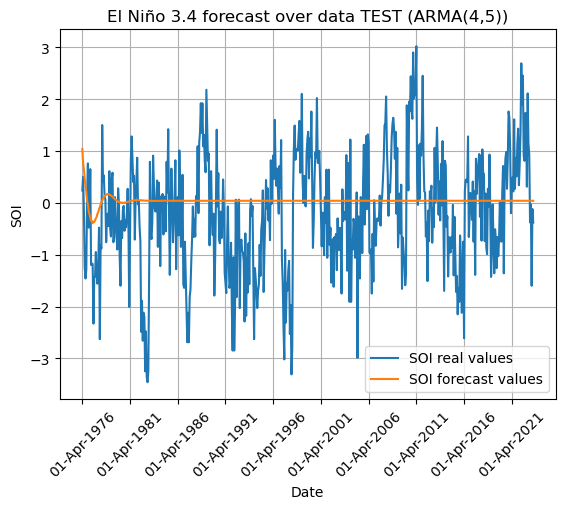

In [34]:
def plot_forecast(order, Ytrain, Ytest, name):
    model = ARIMA(Ytrain, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(Ytest))
    mse = np.mean((Ytest - forecast) ** 2)

    plt.xlabel('Date')
    plt.ylabel('SOI')
    plt.plot(df.loc[Ytest.index]['DateX'], Ytest, label = 'SOI real values')
    plt.plot(df.loc[Ytest.index]['DateX'], forecast, label = 'SOI forecast values')
    plt.xticks(df.loc[Ytest.index].loc[::60]['DateX'], rotation= 45)
    plt.legend(loc='lower right')
    plt.title(f'El Niño 3.4 forecast over data TEST ({name})')
    plt.grid()
    plt.show()

plot_forecast((4,0,0),Ytrain, Ytest, 'AR(4)')
plot_forecast((0,0,11),Ytrain, Ytest, 'MA(11)')
plot_forecast((4,0,5),Ytrain, Ytest, 'ARMA(4,5)')

Se puede notar que para $AR(4)$ y $MA(11)$ el comportamiento en el primer período (1/Apr/1976 - 1/April/1981), es muy similar, mientras que $ARMA(4,5)$ tiene un comportamiento cíclico más pronunciado en el mismo período. Sin embargo, de 1/April/1981 en adelante los tres modelos tienen a la media de los datos de TEST. Este comportamiento es el esperado ya que estos procesos estocásticos estacioanrios tienden a la media de los datos, cuando el tiempo tiende a infinito.

Los 3 modelos tienen un comportamiento adecuado, y pudiéramos usar cualqueira de los tres. Sin embargo, se sugiere utilizar los que menos componentes tengan para que el modelo sea lo más sencillo posible, y además se puede evitar el overfitting, al entrenar el modelo de predicción. Esto último no debe suceder para los datos bajo estudio ya que es una cantidad suficentemente densa de valores.